First lets explore
# CAMB _Halofit_-$\nu$ non-linear matter power spectrum 

In [24]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# import CAMB
import camb
from camb import model, initialpower
# import CLASS
from classy import Class

from ChangTools.plotting import prettyplot
from ChangTools.plotting import prettycolors
prettyplot()
pretty_colors = prettycolors()

# Matter $P(k)$ for different $m_\nu$ at $z = 0.53$
What does $P_m(k)$ look like for different values of $\sum m_\nu$ -- keeping all other parameters the same?

In [5]:
def plot_pk_mnu(): 
    fig = plt.figure(figsize=(7,7))
    sub = fig.add_subplot(111)
    for inu, mnu in enumerate(np.arange(0.0, 1.2, 0.2)): 
        pars = camb.CAMBparams()
        pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=mnu)
        pars.set_dark_energy() #re-set defaults
        pars.InitPower.set_params(ns=0.965)
        pars.set_matter_power(redshifts=[0.53], kmax=2.0) # CMASS redshift 

        #Non-Linear spectra (Halofit)
        pars.NonLinear = model.NonLinear_both

        #calculate results for these parameters
        results = camb.get_results(pars)
        label = None 
        lstyle = '--'
        if mnu == 0.: 
            label = r"$\sum m_\nu = 0.$"
            lstyle = '-'
        elif mnu == 1.: 
            label = r"$\sum m_\nu = 1.$"
            lstyle = '-'
        k, z, pk = results.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)

        sub.plot(k, pk[0,:], color=pretty_colors[inu % 20], label=label, ls=lstyle)

    sub.set_xscale('log') 
    sub.set_xlim([10**-3, 10**0])
    sub.set_xlabel('$\mathtt{k}$', fontsize=25)
    sub.set_yscale('log') 
    sub.set_ylim([10**1.7, 10**4.5])
    sub.set_ylabel('$\mathtt{P_m(k)}$', fontsize=25)

    sub.legend(loc = 'lower left')

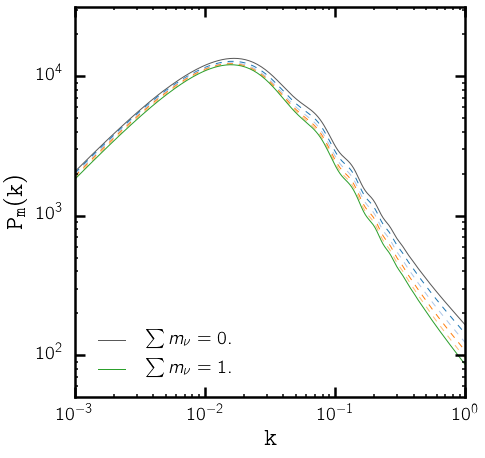

In [6]:
plot_pk_mnu()

In [7]:
mnus = np.arange(0.0, 1.2, 0.2)
ks, delP = [], [] 
for inu, mnu in enumerate(mnus): 
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=mnu)
    pars.set_dark_energy() #re-set defaults
    pars.InitPower.set_params(ns=0.965)
    pars.set_matter_power(redshifts=[0.53], kmax=2.0) # CMASS redshift 
    
    #Non-Linear spectra (Halofit)
    pars.NonLinear = model.NonLinear_both

    #calculate results for these parameters
    results = camb.get_results(pars)
    k, z, pk = results.get_matter_power_spectrum(minkh=1e-3, maxkh=1, npoints = 200)
    if mnu == 0.: 
        pk_mnu0 = pk
    else: 
        delP.append(pk_mnu0 - pk)
        ks.append(k) 

In [8]:
def plot_delp_mnu(): 
    fig = plt.figure(figsize=(7,7))
    sub = fig.add_subplot(111)
    for inu, mnu in enumerate(mnus[1:]): 
        sub.plot(ks[inu], delP[inu].T, c=pretty_colors[inu], label=r'$m_\nu = '+str(round(mnu,2))+'$')
    sub.set_xscale('log') 
    sub.set_xlim([10**-3, 10**0])
    sub.set_xlabel('$\mathtt{k}$', fontsize=25)
    sub.set_ylabel(r'$\mathtt{P_m}^{\Sigma \mathtt{m}_\nu = 0}\mathtt{(k)} - \mathtt{P_m}^{\Sigma \mathtt{m}_\nu}\mathtt{(k)}$', fontsize=25)
    sub.legend(loc='upper right')


## <font color='blue'>_Zhao et al. (2013)_ </font> galaxy $P(k)$ model
For ___one___ of their galaxy $P(k)$ models, they use the $\mathtt{Halofit}$ matter power spectrum above: 

$$ P_g(k;z) = b_\mathrm{HF}^2 P_{\mathrm{HF}_\nu}(k;z) + P_\mathrm{HF}$$

where $b_\mathrm{HF}$ represent the bias and $P_\mathrm{HF}$ represents the shot noise. 

So to get an idea of how fiber collisions can affect the $\sum m_\nu$ inferred from the $P_g(k)$, lets look at $\Delta P_m(k)$ for different $\sum m_\nu$. 

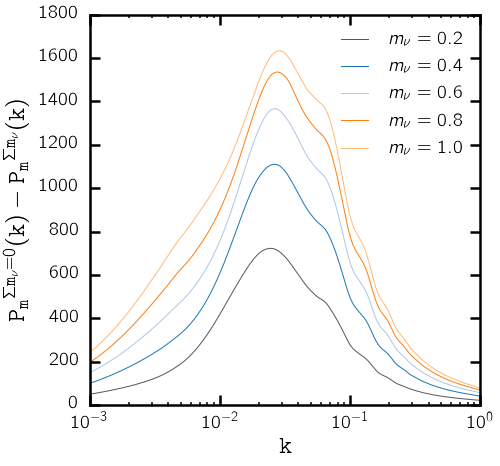

In [9]:
plot_delp_mnu()

# CLASS Boltzmann Code with _Halofit_ non-linear scales

In [31]:
verbosity = 1
verbose = {
    'input_verbose': verbosity, 'background_verbose': verbosity,
    'thermodynamics_verbose': verbosity, 'perturbations_verbose': verbosity,
    'transfer_verbose': verbosity, 'primordial_verbose': verbosity,
    'spectra_verbose': verbosity, 'nonlinear_verbose': verbosity,
    'lensing_verbose': verbosity, 'output_verbose': verbosity
}


scenario = {
    'h': 0.67556,
    'T_cmb': 2.7255,
    'omega_b': 0.022032,
    'N_ur': 2.03351,
    'm_ncdm': 0.04,
    'N_ncdm': 1,
    'T_ncdm': 0.715985,
    'omega_cdm': 0.12038,
    'Omega_k': 0,
    'YHe': 'BBN',
    'z_reio': 11.357,
    'reio_parametrization': 'reio_camb',
    'recombination': 'RECFAST',
    'k_pivot': 0.05,
    'A_s': 2.215e-9,
    'n_s': 0.965, # 0.9619,
    'alpha_s': 0., 
    'output': 'mPk', 
    'P_k_max_1/Mpc': 0.5, 
    'lensing': 'no', 
    'non linear': 'halofit',
    'z_pk': 0.53
    }

        pars = camb.CAMBparams()
        pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=mnu)
        pars.set_dark_energy() #re-set defaults
        pars.InitPower.set_params(ns=0.965)
        pars.set_matter_power(redshifts=[0.53], kmax=2.0) # CMASS redshift 


In [51]:
cosmo = Class() 

def class_mPk(mnu=0., nl_model='halofit'):

    scenario.update({'m_ncdm': mnu, 'omega_cdm': 0.12038 - mnu / 94.07})
    scenario.update({'non linear': nl_model})

    cosmo.set(dict(verbose.items()+scenario.items()))
    cosmo.compute()    

    k_vals = np.logspace(-3, np.log10(0.5), 100) # k values 

    m_pk = np.zeros(len(k_vals))
    for ik, k_tmp in enumerate(k_vals): 
        m_pk[ik] = cosmo.pk(k_tmp, scenario['z_pk'])

    return k_vals, m_pk

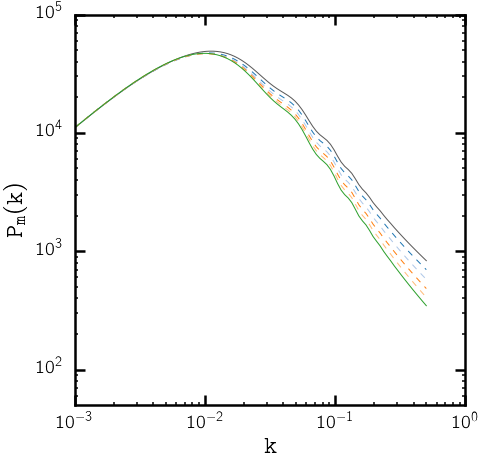

In [52]:
plt.figure(figsize=(7,7))
for i_mnu, mnu in enumerate(mnus): 
    label = None
    lstyle = '--'
    if mnu == 0. or mnu == 1.: 
        label = r"$\sum m_\nu = "+str(round(mnu, 2))+"$"
        lstyle = '-'
    kk, pkk = class_mPk(mnu=mnu)
    plt.plot(kk, pkk, color=pretty_colors[i_mnu % 20], label=label, ls=lstyle)
plt.xscale('log') 
plt.xlim([10**-3, 10**0])
plt.xlabel('$\mathtt{k}$', fontsize=25)
plt.yscale('log') 
plt.ylim([10**1.7, 10**5])
plt.ylabel('$\mathtt{P_m(k)}$', fontsize=25)

# CLASS Boltzmann Code with _Time Renormalization Group_ non-linear scales

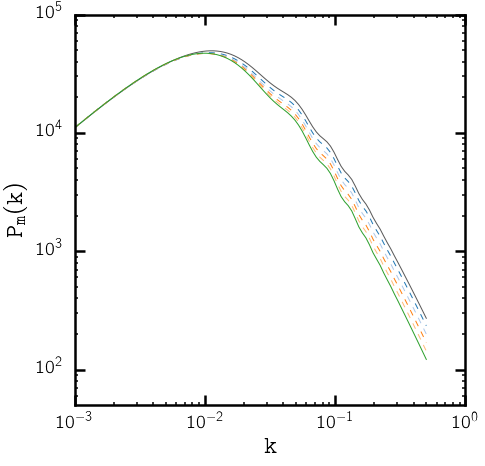

In [53]:
plt.figure(figsize=(7,7))
for i_mnu, mnu in enumerate(mnus): 
    label = None
    lstyle = '--'
    if mnu == 0. or mnu == 1.: 
        label = r"$\sum m_\nu = "+str(round(mnu, 2))+"$"
        lstyle = '-'
    kk, pkk = class_mPk(mnu=mnu, nl_model='trg')
    plt.plot(kk, pkk, color=pretty_colors[i_mnu % 20], label=label, ls=lstyle)
plt.xscale('log') 
plt.xlim([10**-3, 10**0])
plt.xlabel('$\mathtt{k}$', fontsize=25)
plt.yscale('log') 
plt.ylim([10**1.7, 10**5])
plt.ylabel('$\mathtt{P_m(k)}$', fontsize=25)

# CLASS Boltzmann Code with _SPT $1$ Loop_ non-linear scales

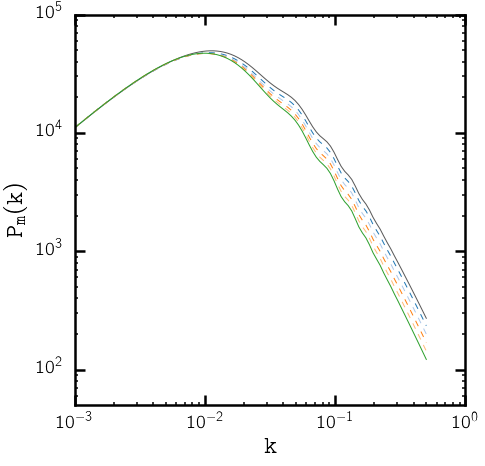

In [54]:
plt.figure(figsize=(7,7))
for i_mnu, mnu in enumerate(mnus): 
    label = None
    lstyle = '--'
    if mnu == 0. or mnu == 1.: 
        label = r"$\sum m_\nu = "+str(round(mnu, 2))+"$"
        lstyle = '-'
    kk, pkk = class_mPk(mnu=mnu, nl_model='s1l')
    plt.plot(kk, pkk, color=pretty_colors[i_mnu % 20], label=label, ls=lstyle)
plt.xscale('log') 
plt.xlim([10**-3, 10**0])
plt.xlabel('$\mathtt{k}$', fontsize=25)
plt.yscale('log') 
plt.ylim([10**1.7, 10**5])
plt.ylabel('$\mathtt{P_m(k)}$', fontsize=25)

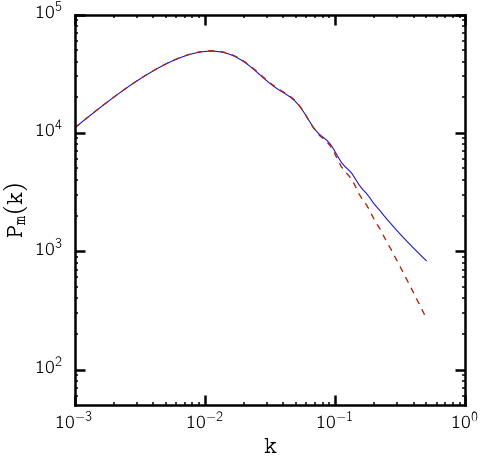

In [56]:
plt.figure(figsize=(7,7))
mnu = 0. 
for model in ['halofit', 'trg', 'one-loop']:
    kk, pkk = class_mPk(mnu=mnu, nl_model=model)
    if model == 'halofit': 
        lstyle = '-'
    elif model == 'trg': 
        lstyle = '--'
    elif model == 's1l': 
        lstyle = '-.'
    plt.plot(kk, pkk, label=model, ls=lstyle)
plt.xscale('log') 
plt.xlim([10**-3, 10**0])
plt.xlabel('$\mathtt{k}$', fontsize=25)
plt.yscale('log') 
plt.ylim([10**1.7, 10**5])
plt.ylabel('$\mathtt{P_m(k)}$', fontsize=25)

In [61]:
print class_mPk(mnu=0., nl_model='halofit')[1][-10:]
print cosmo.nonlinear()
print class_mPk(mnu=0., nl_model='one-loop')[1][-10:]
print class_mPk(mnu=0., nl_model='trg')[1][-10:]
print class_mPk(mnu=0., nl_model='test-linear')[1][-10:]

[ 1580.22181049  1464.34267551  1358.35063282  1261.48928982  1173.85868855
  1093.41260464  1019.88278396   952.25857364   889.86761531   832.14882274]


AttributeError: 'classy.Class' object has no attribute 'nonlinear'